In [ ]:
%pip install numpy==1.23.5 pandas==1.5.3
# %pip install -U matplotlib==3.6.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# attempting spark

In [ ]:
# %pip install pyspark==3.3.1

# just 1 csv in pandas

### just the very first day

In [6]:
'''bonus step: dropping any rows where the PatientId or timestamp is missing'''
initRows = day1.shape[0]
day1 = day1.dropna(subset=['PatientId','GlucoseDisplayTime'], how='any')
print(initRows - day1.shape[0], "rows with missing patient ID or timestamp have been removed")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
0 rows with missing patient ID or timestamp have been removed


next is to change PatientIDs to ints. this is for saving memory space and for our own sanity.

#### read in the cohort data

In [ ]:
'''the index col wasn't removed before saving this csv, so repurpose it to the int ID column'''
cohort = pd.read_csv("../../cephfs/data/cohort.csv")
cohort = cohort.rename(columns={'Unnamed: 0':'intPatientId','UserId':'PatientId'})

'''check for duplicates'''
if len(cohort['intPatientId'].unique()) != len(cohort['PatientId'].unique()) \
    and len(cohort['PatientId'].unique()) != cohort.shape[0]:
    raise NameError("ERROR: duplicate patients found in cohort.csv file")

cohort

In [ ]:
#probably worth adding a function in here that just automatically checks for if any rows are missing data and then deal with that

## replace string IDs with int IDs

next steps: replace 'PatientId' in `day1` dataframe using the key of {'UserId' : 'PatientIdInt'} from `cohort` dataframe
<br>
(not sure if a "merge + drop col + rename col" will be more economical, or if "replace" with dicts will be.)

In [9]:
day1Merged = day1.merge(cohort[['PatientId','intPatientId']],
                         how = "inner",
                         on = "PatientId") \
        .drop(columns="PatientId") \
        .rename(columns={'intPatientId':'PatientId'})
day1Merged = day1Merged[['PatientId','GlucoseDisplayTime','Value']] #reorder columns for aesthetics
#maybe right merge? it'd eliminate any day1.PatientId's that don't appear in cohort.csv ?
day1Merged

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 10 µs


,PatientId,GlucoseDisplayTime,Value
0,1560,2022-02-01 14:45:00,0
1,1560,2022-02-01 04:15:00,155
2,1560,2022-02-01 06:45:00,114
3,1560,2022-02-01 12:15:00,207
4,1560,2022-01-31 21:30:00,156
...,...,...,...
1663020,3735,2022-02-01 00:21:00,0
1663021,3735,2022-02-01 06:07:00,0
1663022,3735,2022-01-31 21:17:00,0
1663023,3735,2022-01-31 20:51:00,0


# multiple days

In [ ]:
#import the patient ID dataframe

'''the index col wasn't removed before saving this csv, so repurpose it to the int ID column'''
cohort = pd.read_csv("../../cephfs/data/cohort.csv")
cohort = cohort.rename(columns={'Unnamed: 0':'intPatientId','UserId':'PatientId'})

'''check for duplicates'''
if len(cohort['intPatientId'].unique()) != len(cohort['PatientId'].unique()) \
    and len(cohort['PatientId'].unique()) != cohort.shape[0]:
    raise NameError("ERROR: duplicate patients found in cohort.csv file")

# cohort.to_csv("../../cephfs/cleanedData/cohort.csv", index=False)
cohort

In [ ]:
'''import everything'''

In [ ]:
# data.to_csv("../../cephfs/cleanedData/2022-02_temp.csv", index=False)

## can pick up from here

In [2]:
# data = pd.read_csv("../../cephfs/cleanedData/2022-02_temp.csv", low_memory=False, parse_dates=['GlucoseDisplayTime'])
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49217137 entries, 0 to 49217136
Data columns (total 3 columns):
 #   Column              Dtype         
---  ------              -----         
 0   PatientId           int64         
 1   GlucoseDisplayTime  datetime64[ns]
 2   Value               int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 GB
CPU times: user 21.9 s, sys: 3.01 s, total: 24.9 s
Wall time: 14min 45s


In [13]:
'''only wanted to do this for the first month (feb 2022) to get rid of jan 2022 and 2021 data'''
data = data[data['GlucoseDisplayTime'].dt.date >= pd.Timestamp(year=2022, month=2, day=1)]
data['GlucoseDisplayTime'].dt.date.unique()

/tmp/ipykernel_219/3753550574.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  data = data[data['GlucoseDisplayTime'].dt.date >= pd.Timestamp(year=2022, month=2, day=1)]


array([datetime.date(2022, 2, 1), datetime.date(2022, 2, 2),
       datetime.date(2022, 2, 3), datetime.date(2022, 2, 4),
       datetime.date(2022, 2, 5), datetime.date(2022, 2, 6),
       datetime.date(2022, 2, 7), datetime.date(2022, 2, 8),
       datetime.date(2022, 2, 9), datetime.date(2022, 2, 10),
       datetime.date(2022, 2, 11), datetime.date(2022, 2, 12),
       datetime.date(2022, 2, 13), datetime.date(2022, 2, 14),
       datetime.date(2022, 2, 15), datetime.date(2022, 2, 16),
       datetime.date(2022, 2, 17), datetime.date(2022, 2, 18),
       datetime.date(2022, 2, 19), datetime.date(2022, 2, 20),
       datetime.date(2022, 2, 21), datetime.date(2022, 2, 22),
       datetime.date(2022, 2, 23), datetime.date(2022, 2, 24),
       datetime.date(2022, 2, 25), datetime.date(2022, 2, 26),
       datetime.date(2022, 2, 27), datetime.date(2022, 2, 28),
       datetime.date(2022, 3, 1)], dtype=object)

In [15]:
data.to_csv("../../cephfs/cleanedData/2022-02_temp.csv", index=False)

# 100 patients

## making the sample

### get patients with enough data in february

In [2]:
usableValues = pd.read_csv("../../cephfs/cleanedData/2022-02_temp.csv", low_memory=False, parse_dates=['GlucoseDisplayTime'])

In [3]:
usableValues['Value'] = usableValues['Value'].replace(0, np.nan)
usableValues = usableValues.groupby('PatientId') \
                            .agg({'GlucoseDisplayTime': 'nunique', 'Value': 'count'}) \
                            .reset_index()
# usableValues = usableValues[(usableValues['GlucoseDisplayTime']>=6452) & (usableValues['Value']>=6452)]
usableValues

,PatientId,GlucoseDisplayTime,Value
0,0,8058,7982
1,2,5771,5661
2,3,6133,5965
3,4,5154,4242
4,5,521,506
...,...,...,...
6904,7993,8018,7729
6905,7994,6945,4755
6906,7997,7761,7640
6907,7998,8016,7529


In [4]:
minPercent = 28*(60/5)*24 * 0.80
usableValues = usableValues[(usableValues['GlucoseDisplayTime']>=minPercent) & (usableValues['Value']>=minPercent)]
usableValues

,PatientId,GlucoseDisplayTime,Value
0,0,8058,7982
5,7,7810,7453
6,9,8070,7978
7,11,8016,7877
8,12,7847,6818
...,...,...,...
6903,7990,8026,7287
6904,7993,8018,7729
6906,7997,7761,7640
6907,7998,8016,7529


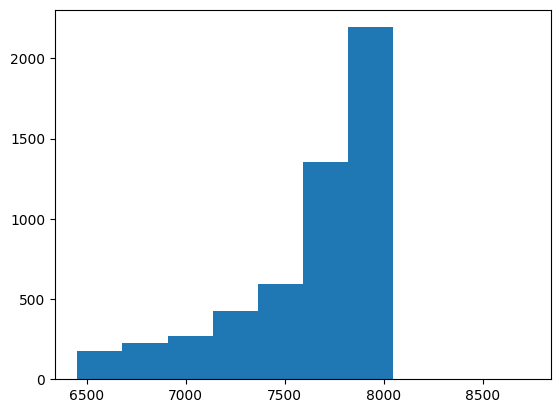

In [10]:
plt.hist(usableValues['Value'], bins=10)
plt.show()

### back to the cohort data

In [ ]:
cohort = pd.read_csv("../../cephfs/cleanedData/cohort.csv")
cohort

In [6]:
cohort['AgeBin'] = "age>=90"

ageRanges = np.linspace(30,90,7, dtype=int)
for i in range(0,len(ageRanges)-1):
        cohort.loc[(cohort['Age']>=ageRanges[i]) & (cohort['Age']<ageRanges[i+1]), 'AgeBin'] = "%i<=age<%i"%(ageRanges[i],ageRanges[i+1])

In [7]:
cols = ['Gender','Treatment','AgeBin']

for c in cols:
    temp = cohort[[c,'PatientId']] \
                .groupby(c) \
                .count() \
                .rename(columns={'PatientId':'how many to sample'}) \
                /8000*100
    print(temp.round(0))
print("round age>=90 up to 1")

        how many to sample
Gender                    
Female                50.0
Male                  50.0
                 how many to sample
Treatment                          
no                             15.0
yes-both                       61.0
yes-fast-acting                 9.0
yes-long-acting                15.0
            how many to sample
AgeBin                        
30<=age<40                 6.0
40<=age<50                19.0
50<=age<60                25.0
60<=age<70                25.0
70<=age<80                20.0
80<=age<90                 4.0
age>=90                    0.0
round age>=90 up to 1


In [56]:
cohortSample = cohort[cohort['intPatientId'].isin(usableValues['PatientId'].values)]
cohortSample = cohortSample.sample(n=100, random_state=16)
cohortSample = cohortSample.drop(index=[1340,387,1390,1328,2158]) #1526
cohortSample = pd.concat([cohortSample, cohort.iloc[[7990,7937,7993,7989,1180]]])

for c in cols:
    temp = cohortSample[[c,'PatientId']].groupby(c).count() \
                .rename(columns={'PatientId':'number sampled'})
    print(temp)

        number sampled
Gender                
Female              50
Male                50
                 number sampled
Treatment                      
no                           15
yes-both                     61
yes-fast-acting               9
yes-long-acting              15
            number sampled
AgeBin                    
30<=age<40               6
40<=age<50              18
50<=age<60              25
60<=age<70              25
70<=age<80              21
80<=age<90               4
age>=90                  1


In [60]:
cohortSample.to_csv("../../cephfs/cleanedData/cohortSample.csv", index=False)

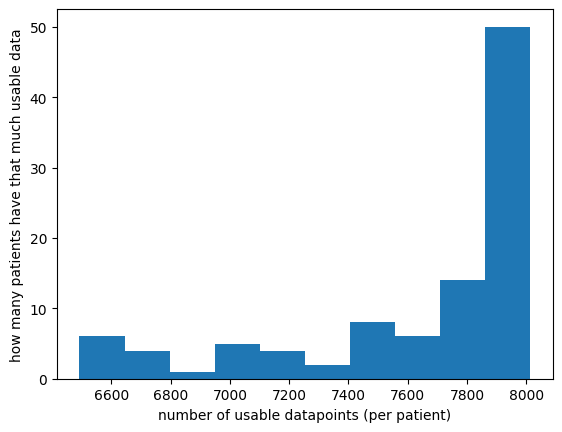

In [59]:
temp = cohortSample.merge(usableValues, how="inner", left_on="intPatientId", right_on="PatientId")
plt.hist(temp['Value'], bins=10)
plt.xlabel("number of usable datapoints (per patient)")
plt.ylabel("how many patients have that much usable data")
del temp

## loading in the sample

### creating the glucose data sample set

In [ ]:
cohort = pd.read_csv("../../cephfs/cleanedData/cohortSample.csv")
cohort

In [4]:
data = pd.read_csv("../../cephfs/cleanedData/2022-02_temp.csv", low_memory=False, parse_dates=['GlucoseDisplayTime'])

In [ ]:
data = data[data['PatientId'].isin(cohort['intPatientId'].values)]
data

In [6]:
data.to_csv("../../cephfs/cleanedData/2022-02_sample.csv", index=False)

# load in the glucose data sample set

In [ ]:
data = pd.read_csv("../../cephfs/cleanedData/2022-02_sample.csv", parse_dates=['GlucoseDisplayTime'])
data = data.rename(columns={"GlucoseDisplayTime":"GlucoseDisplayDateTime"})
#"GlucoseDisplayTime" is not renamed in Jamie's notebook
data

In [ ]:
data['GlucoseDisplayHour'] = data['GlucoseDisplayDateTime'].dt.hour \
                            + data['GlucoseDisplayDateTime'].dt.minute/60
                            # + data['GlucoseDisplayDateTime'].dt.second/3600 #there are no seconds saved in this version of the data
#'GlucoseDisplayHour' is named 'GlucoseDisplayTimeNoDay' in Jamie's notebook
data['GlucoseDisplayDate'] = data['GlucoseDisplayDateTime'].dt.date
data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782079 entries, 0 to 782078
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PatientId               782079 non-null  int64         
 1   GlucoseDisplayDateTime  782079 non-null  datetime64[ns]
 2   Value                   782079 non-null  int64         
 3   GlucoseDisplayHour      782079 non-null  float64       
 4   GlucoseDisplayDate      782079 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 29.8+ MB
